In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

<h3>Features of the dataset</h3>
<p>
<ul>
<li> Alcohol -> Alcohol content in percentage 

<li>Malic acid -> Malic acid content in grams per liter
<li>Ash	-> Ash content in grams per liter
<li>Alcalinity of ash -> Total alkalinity of ash in meq per liter
<li>Magnesium -> Magnesium content in milligrams per liter
<li>Total phenols -> Total phenols content in milligrams per liter
<li>Flavanoids -> Flavanoids content in milligrams per liter
<li>Nonflavanoid phenols -> Nonflavanoid phenols content in milligrams per liter
<li>Proanthocyanins	-> Proanthocyanins content in milligrams per liter
<li>Color intensity -> Color intensity
<li>Hue	-> Hue
<li>OD280/OD315 of diluted wines -> OD280/OD315 of diluted wines
<li>Proline -> Proline content in milligrams per liter
<li>Target -> Class 0, 1 and 2
</ul>

<p>

In [2]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['target'] = pd.Series(wine.target)

In [3]:
wine_df.shape

(178, 14)

In [4]:
data = wine_df

In [5]:
# data = pd.read_csv("winequality-red.csv")

In [6]:
# data.shape

In [7]:
# column = data.columns

In [8]:
# column

In [9]:
# The dataset shows the ranking of the quality of the dataset from 0-10 0 being the lowest and 10 being the highest

<AxesSubplot:>

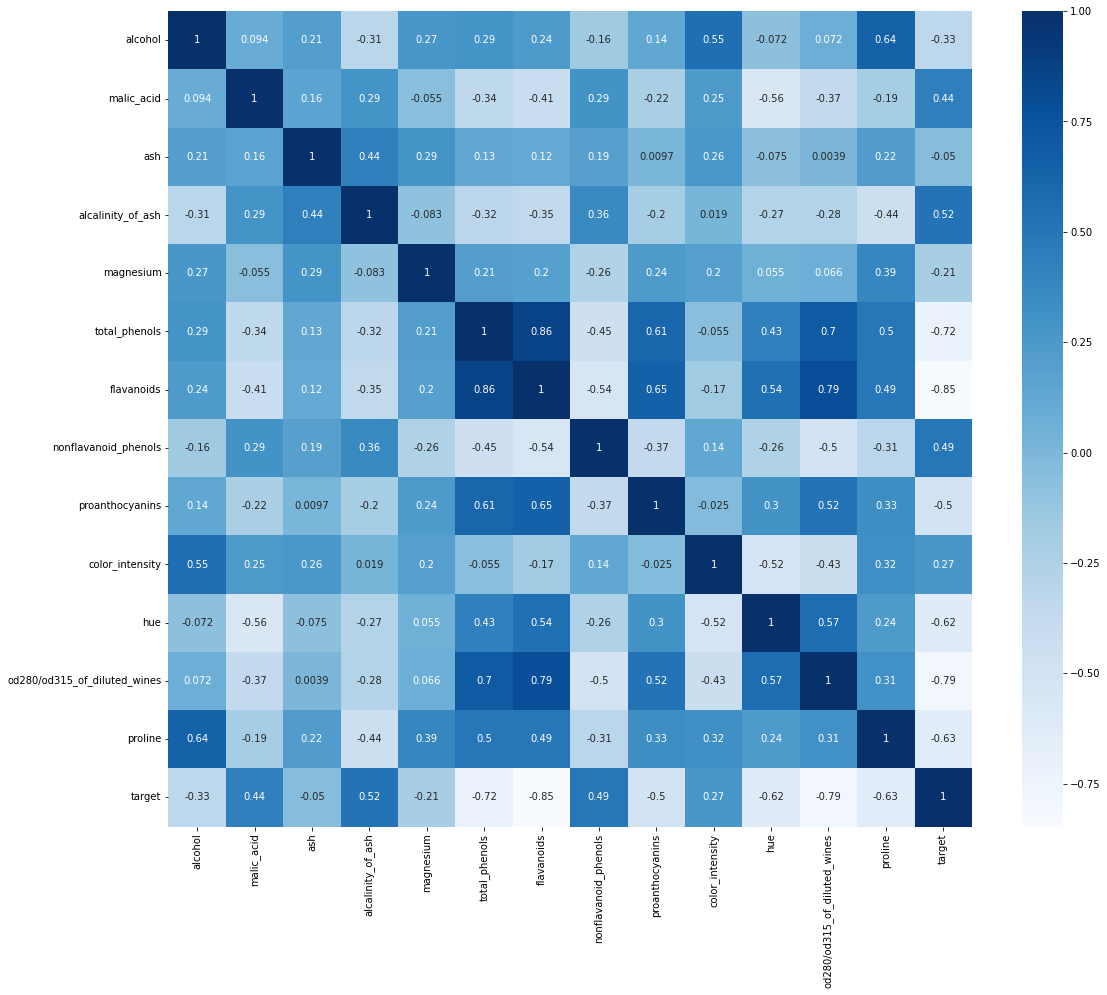

In [10]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, cmap="Blues", annot=True)

In [11]:
# data["quality"].value_counts()

In [12]:
data["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [13]:
# Three classes low medium and high
# 0-4 -> 0
# 5 -> 1
#6-7 -> 2
# 8-10 3

In [14]:
# ranges = [0, 4, 5, 7, 10]
# labels = [0, 1, 2, 3]

In [15]:
# data['quality_label'] = np.select(
#     [data['quality'].between(ranges[i], ranges[i+1], inclusive='right') for i in range(len(labels))],
#     labels,
#     default=''
# )

In [16]:
# df_y = data["quality_label"]
df_y = data["target"]

In [17]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [18]:
df_y = df_y.astype(int)

In [19]:
df_y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [20]:
df_y.shape

(178,)

In [21]:
df_y = df_y.values.reshape(-1, 1)

In [22]:
# data["quality_label"].value_counts()

In [23]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [24]:
df_x = data.drop(columns=["target"])

In [25]:
data.shape,df_x.shape, df_y.shape

((178, 14), (178, 13), (178, 1))

In [26]:
data["target"].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

<h2>Exprolatory Data Analysis

In [27]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

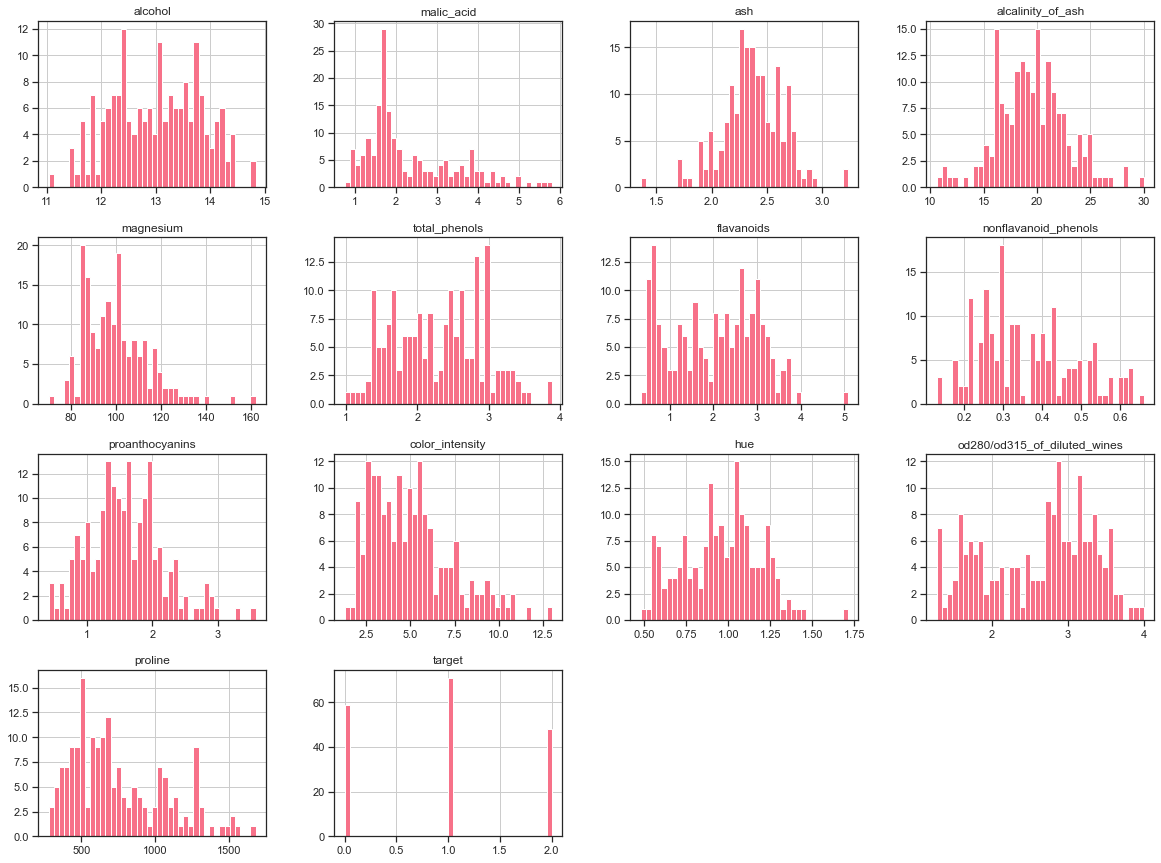

In [51]:
data.hist(bins=40, figsize=(20,15))

In [29]:
# column_name = data.target

column_name = wine.feature_names

In [30]:
column_name

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [31]:
# plt.bar(data["quality_label"], data["alcohol"])

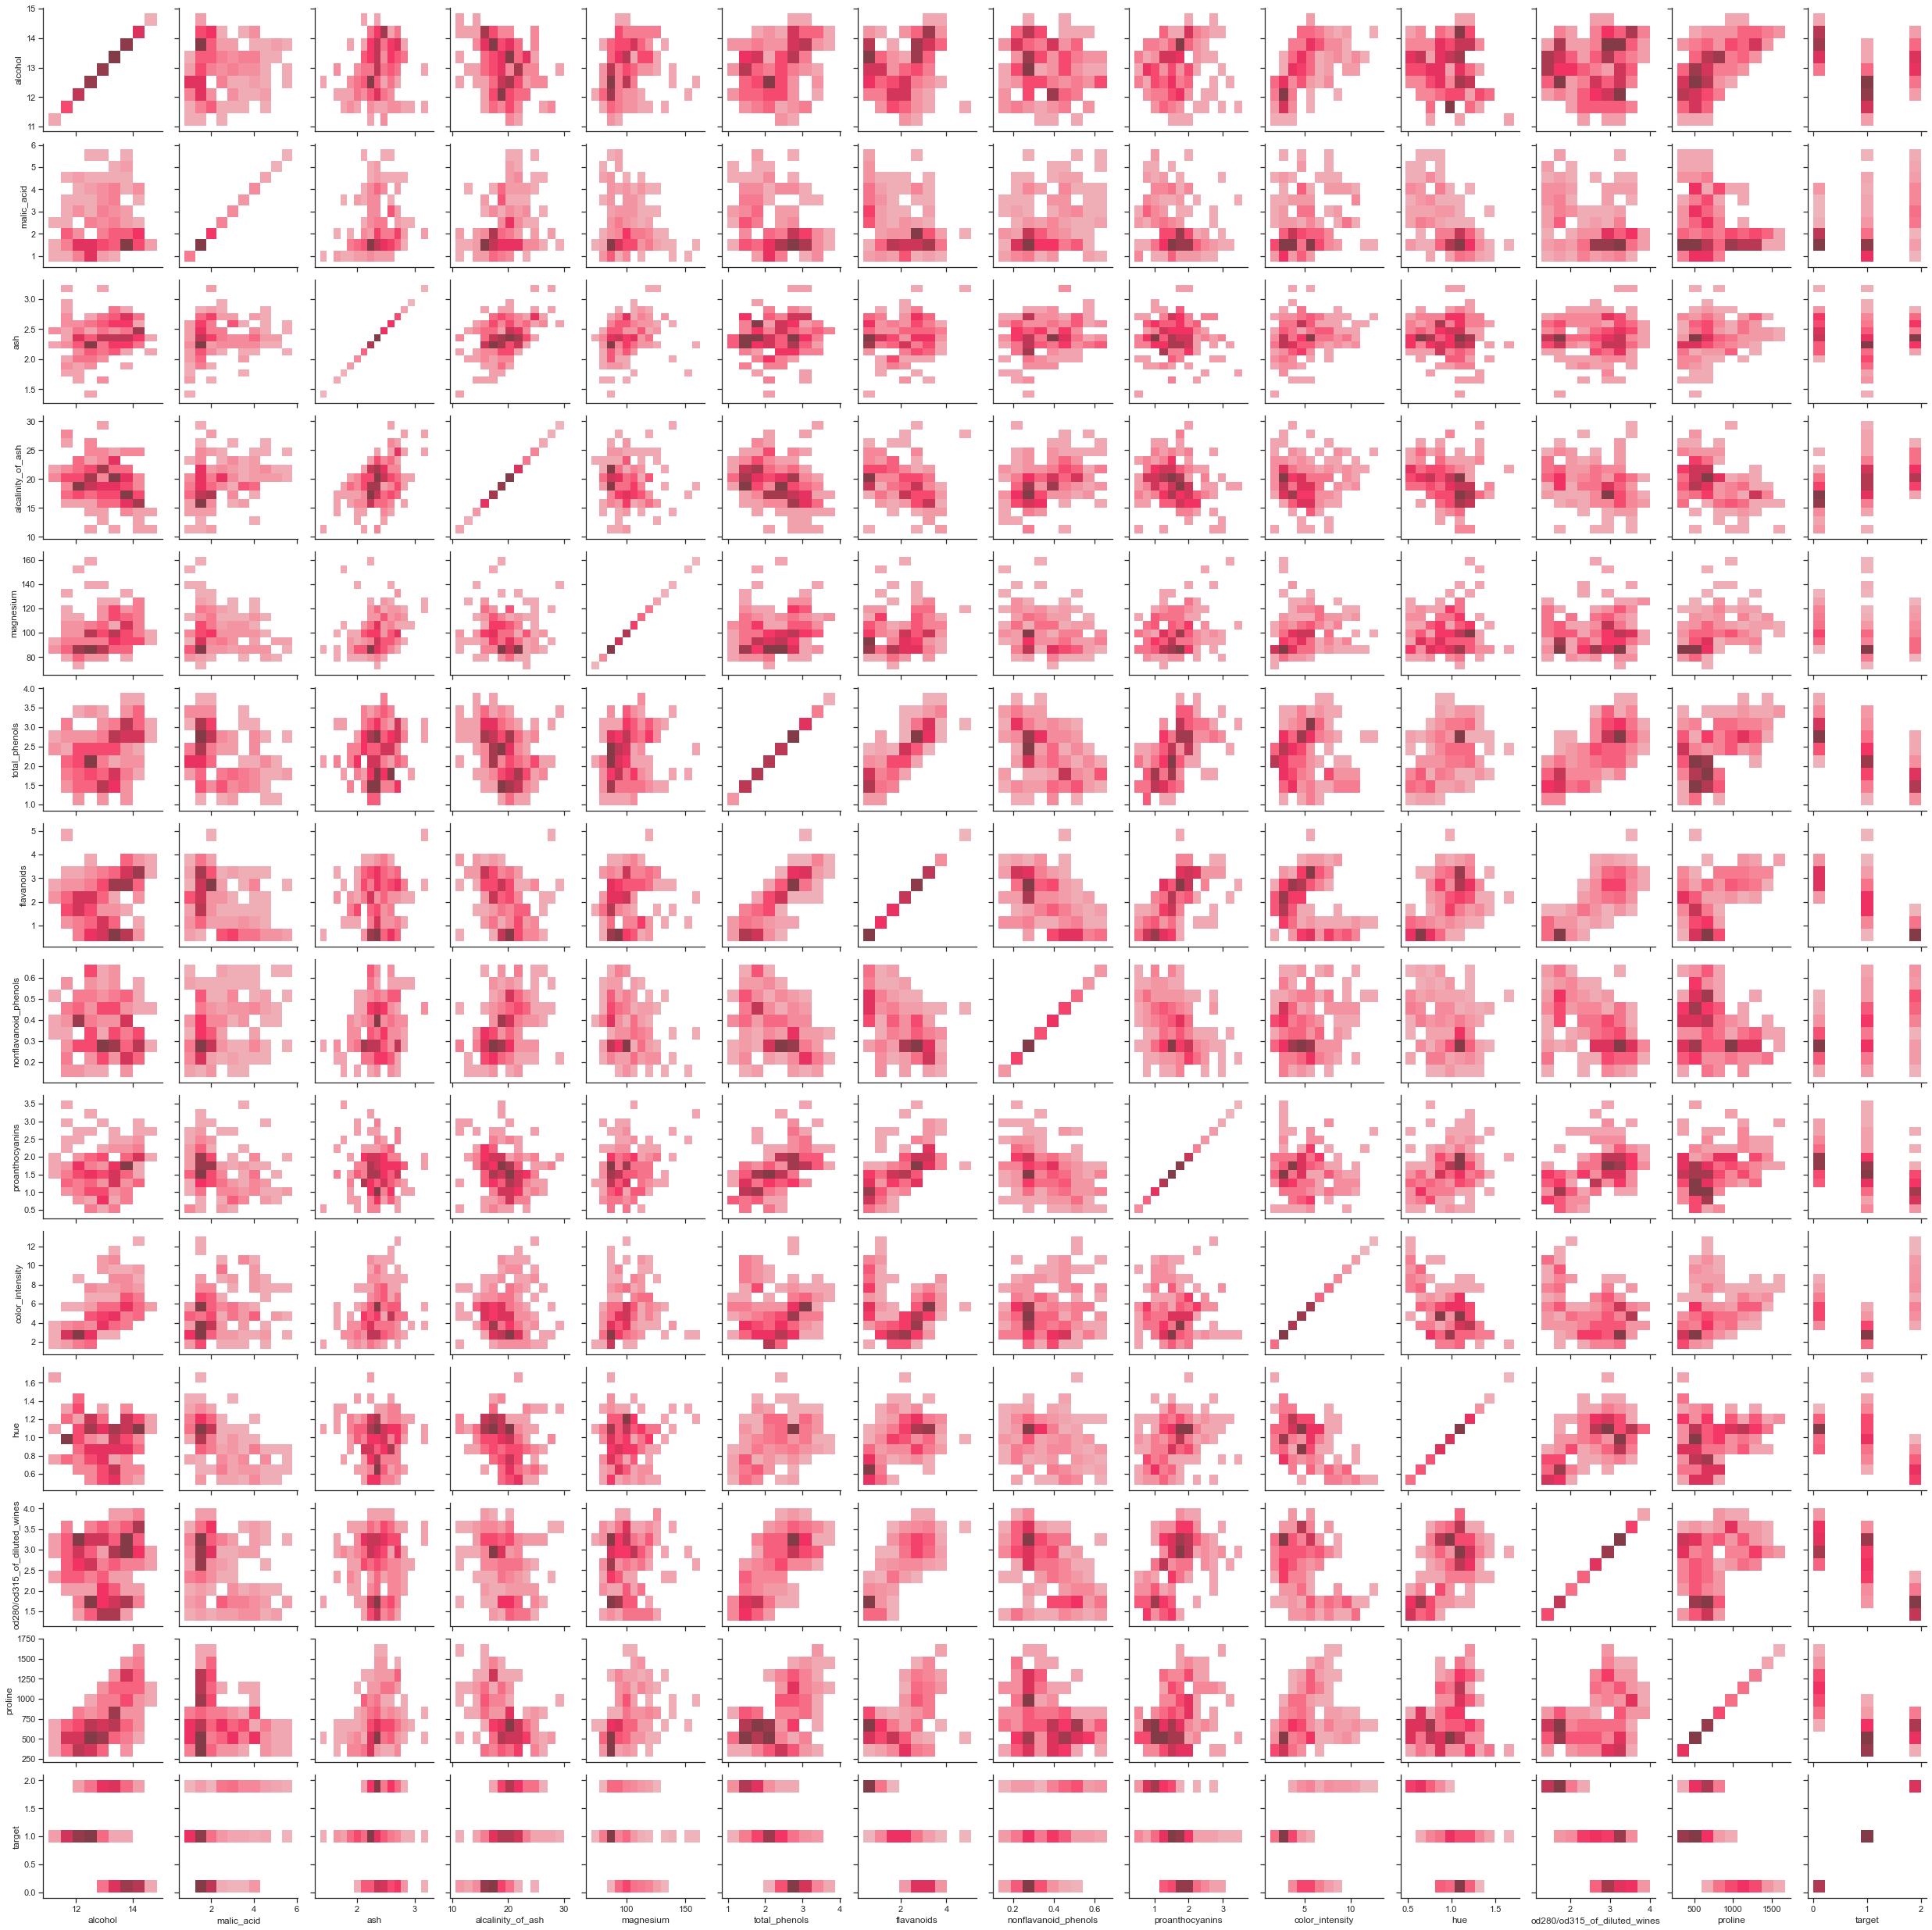

In [49]:
g = sns.PairGrid(data)
g.map(sns.histplot)

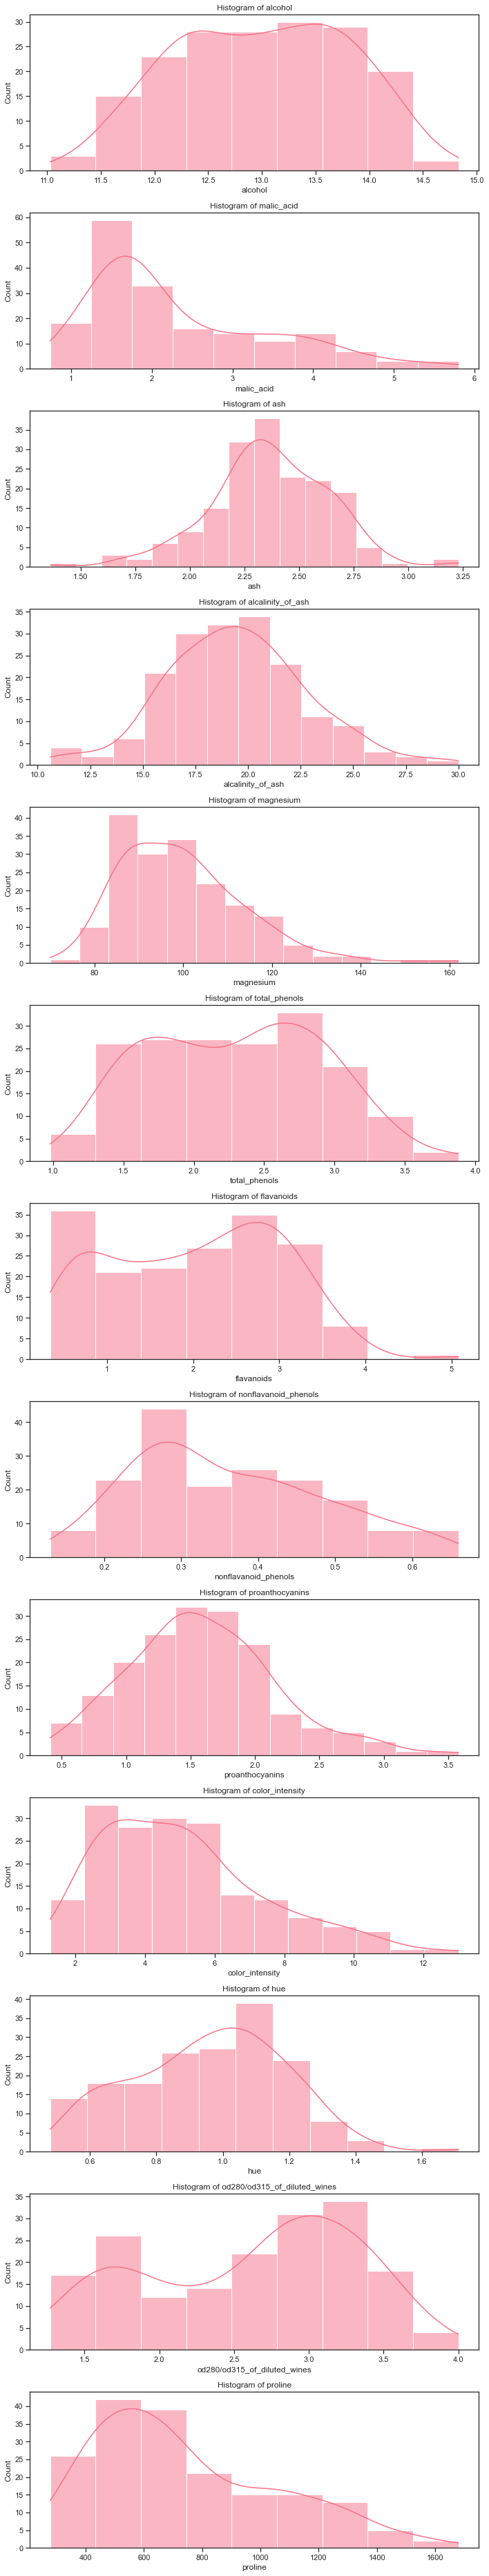

In [50]:
fig, axes = plt.subplots(nrows=len(wine.feature_names), ncols=1, figsize=(10, len(wine.feature_names) * 4))

# Iterate over each column and plot the features
for i, column in enumerate(wine.feature_names):
    # Select the current axis
    ax = axes[i]
    
    # Plot histogram
    sns.histplot(data[column], ax=ax, kde=True)
    
    # Set axis labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {column}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

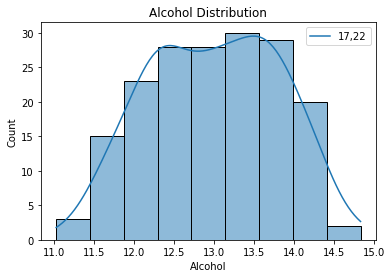

In [32]:
sns.histplot(data["alcohol"], kde=True)
plt.title("Alcohol Distribution")
plt.xlabel("Alcohol")
plt.ylabel("Count")
plt.legend(["17,22"])

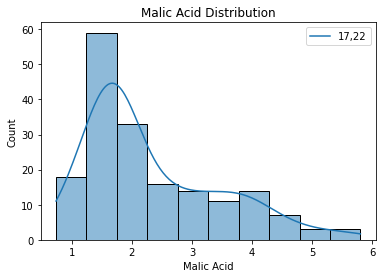

In [33]:
sns.histplot(data["malic_acid"], kde=True)
plt.title("Malic Acid Distribution")
plt.xlabel("Malic Acid")
plt.ylabel("Count")
plt.legend(["17,22"])

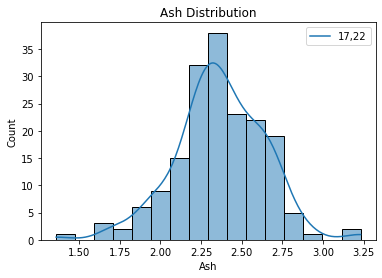

In [34]:
sns.histplot(data["ash"], kde=True)
plt.title("Ash Distribution")
plt.xlabel("Ash")
plt.ylabel("Count")
plt.legend(["17,22"])

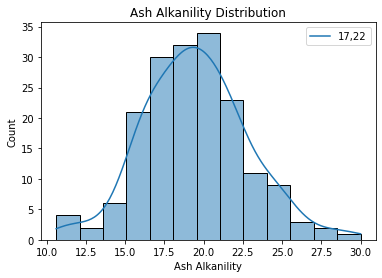

In [35]:
sns.histplot(data["alcalinity_of_ash"], kde=True)
plt.title("Ash Alkanility Distribution")
plt.xlabel("Ash Alkanility")
plt.ylabel("Count")
plt.legend(["17,22"])

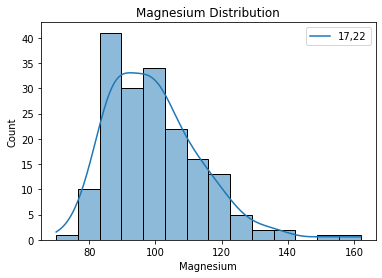

In [36]:
sns.histplot(data["magnesium"], kde=True)
plt.title("Magnesium Distribution")
plt.xlabel("Magnesium")
plt.ylabel("Count")
plt.legend(["17,22"])

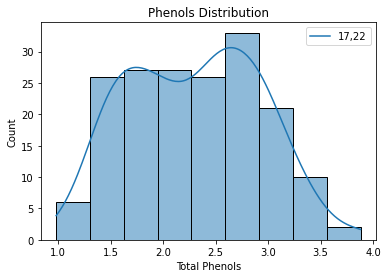

In [37]:
sns.histplot(data["total_phenols"], kde=True)
plt.title("Phenols Distribution")
plt.xlabel("Total Phenols")
plt.ylabel("Count")
plt.legend(["17,22"])

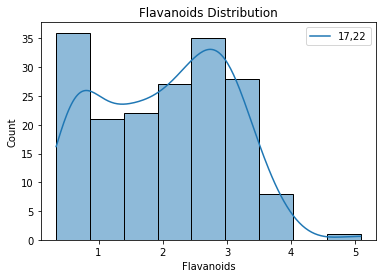

In [38]:
sns.histplot(data["flavanoids"], kde=True)
plt.title("Flavanoids Distribution")
plt.xlabel("Flavanoids")
plt.ylabel("Count")
plt.legend(["17,22"])

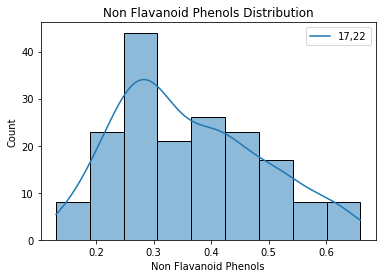

In [39]:
sns.histplot(data["nonflavanoid_phenols"], kde=True)
plt.title("Non Flavanoid Phenols Distribution")
plt.xlabel("Non Flavanoid Phenols")
plt.ylabel("Count")
plt.legend(["17,22"])

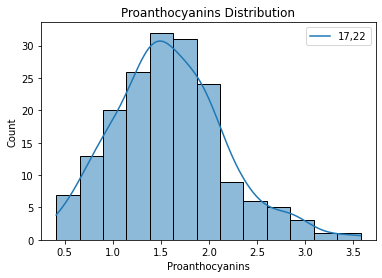

In [40]:
sns.histplot(data["proanthocyanins"], kde=True)
plt.title("Proanthocyanins Distribution")
plt.xlabel("Proanthocyanins")
plt.ylabel("Count")
plt.legend(["17,22"])

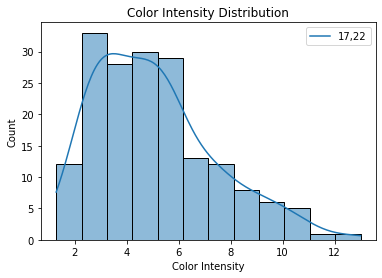

In [41]:
sns.histplot(data["color_intensity"], kde=True)
plt.title("Color Intensity Distribution")
plt.xlabel("Color Intensity")
plt.ylabel("Count")
plt.legend(["17,22"])

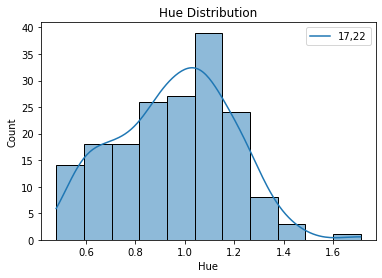

In [42]:
sns.histplot(data["hue"], kde=True)
plt.title("Hue Distribution")
plt.xlabel("Hue")
plt.ylabel("Count")
plt.legend(["17,22"])

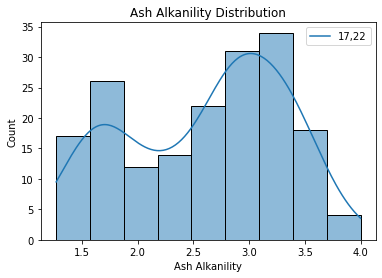

In [43]:
sns.histplot(data["od280/od315_of_diluted_wines"], kde=True)
plt.title("Ash Alkanility Distribution")
plt.xlabel("Ash Alkanility")
plt.ylabel("Count")
plt.legend(["17,22"])

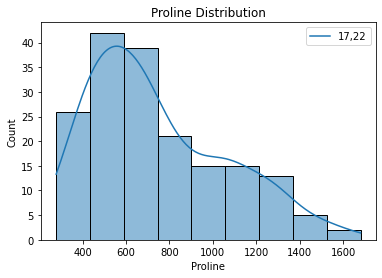

In [44]:
sns.histplot(data["proline"], kde=True)
plt.title("Proline Distribution")
plt.xlabel("Proline")
plt.ylabel("Count")
plt.legend(["17,22"])

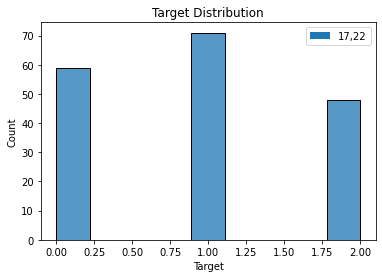

In [45]:
sns.histplot(data["target"])
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(["17,22"])

<h3>Decision Tree without using any hyperparameters

In [32]:
df_y.shape

(178, 1)

In [33]:
# df_x = data.drop(columns=["quality", "quality_label"])
# df_x = data.drop(columns=["quality"])

In [34]:
df_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [47]:
data[:10].to_csv("data10.csv")

In [36]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=1/3, random_state=20)

In [37]:
train_x.shape, train_y.shape

((118, 13), (118, 1))

In [37]:
clf_dt1 = DecisionTreeClassifier(criterion="entropy")
clf_dt1.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

In [38]:
labels = ["0","1","2"]

Text(0.85, 0.8, '[17, 22]')

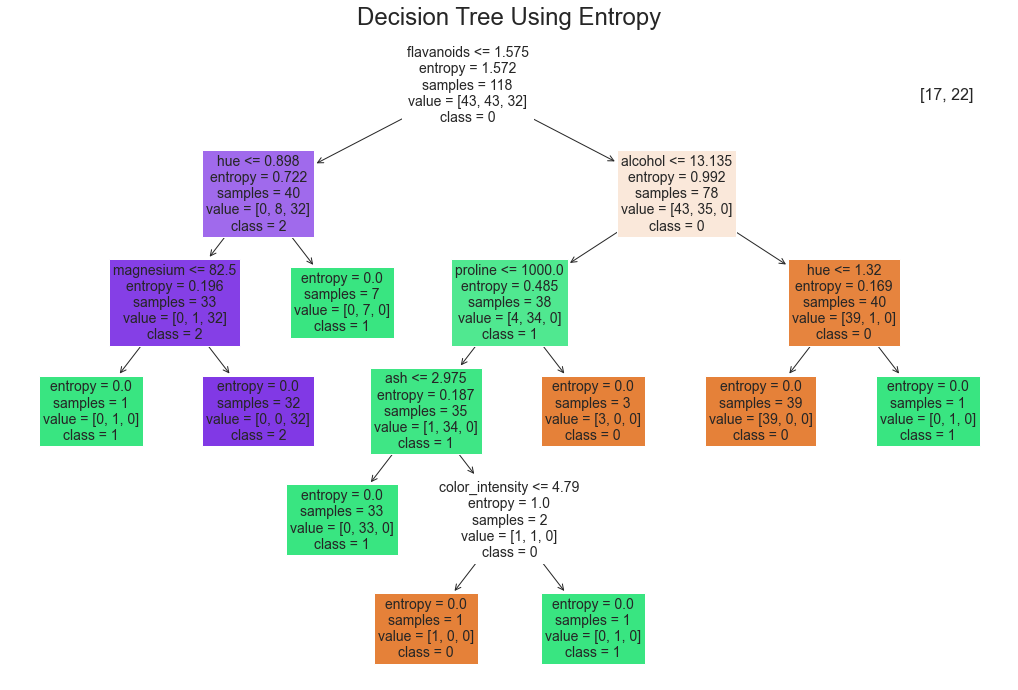

In [53]:
# plt.figure(figsize=(40,20))
# tree.plot_tree(classifier_1)
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf_dt1, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=14
                   )
plt.title("Decision Tree Using Entropy", fontsize=24)
plt.figtext(0.85,0.8,'[17, 22]',ha='center',fontsize=16)

Accuracy score of train set


In [54]:
report_dt1_train = classification_report(clf_dt1.predict(train_x), train_y)
print(report_dt1_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [55]:
report_dt1_test = classification_report(test_y, clf_dt1.predict(test_x))
print(report_dt1_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.84      0.93      0.88        28
           2       1.00      0.81      0.90        16

    accuracy                           0.88        60
   macro avg       0.90      0.87      0.88        60
weighted avg       0.89      0.88      0.88        60



In [42]:
y_pred =clf_dt1.predict(test_x)

In [43]:
cm = confusion_matrix(test_y, y_pred)

In [44]:
test_x.shape

(60, 13)

In [45]:
cm.flatten().sum()

60

Text(0.9, 0.85, '[17, 22]')

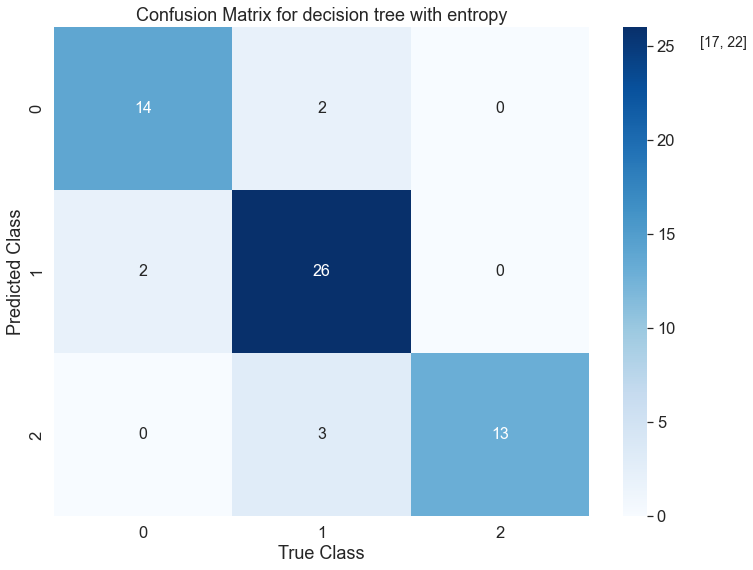

In [56]:
plt.figure(figsize=(12, 9))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues',annot_kws={"fontsize": 16})
sns.set(font_scale=1.5)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title("Confusion Matrix for decision tree with entropy")
plt.figtext(0.9,0.85,'[17, 22]',ha='center',fontsize=14)

In [57]:
feature_importance = clf_dt1.feature_importances_

In [58]:
feature_importance

array([0.28148289, 0.        , 0.02453551, 0.        , 0.03485308,
       0.        , 0.42701804, 0.        , 0.        , 0.01078207,
       0.15719481, 0.        , 0.06413359])

In [59]:
#  This sorts the values in the feature importances in a descending order
sorted_indices = feature_importance.argsort()[::-1]

In [60]:
#  The sorted importance sorts the imporance values using the indices provided
sorted_importance = feature_importance[sorted_indices]

In [61]:
# Sorts the features of the datset in the sorted manner
sorted_features = train_x.columns[sorted_indices]

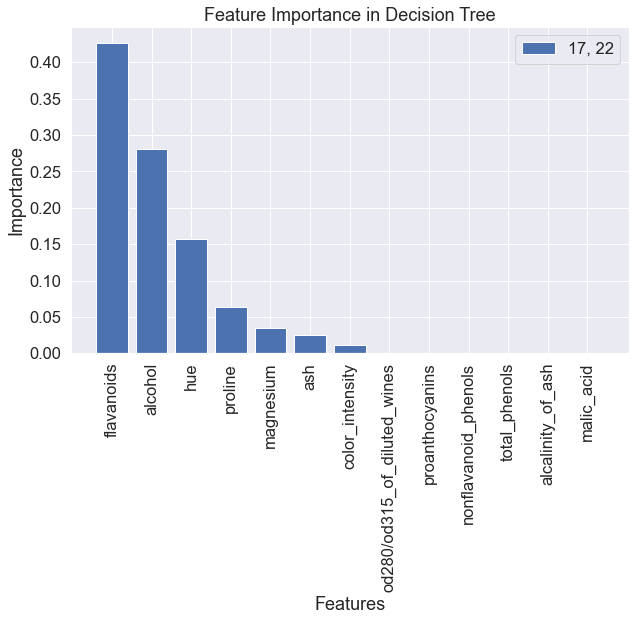

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=90)
plt.legend(["17, 22"])
plt.show()

In [63]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [64]:
scores = cross_val_score(clf_dt1, df_x, df_y, cv=5)

In [65]:
scores.mean()

0.9103174603174604

In [66]:
y_pred_train = clf_dt1.predict(train_x)
accuracy_score(train_y, y_pred_train)

1.0

<h3>Classification with hyperparameters

In [127]:
clf_dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_dt2.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

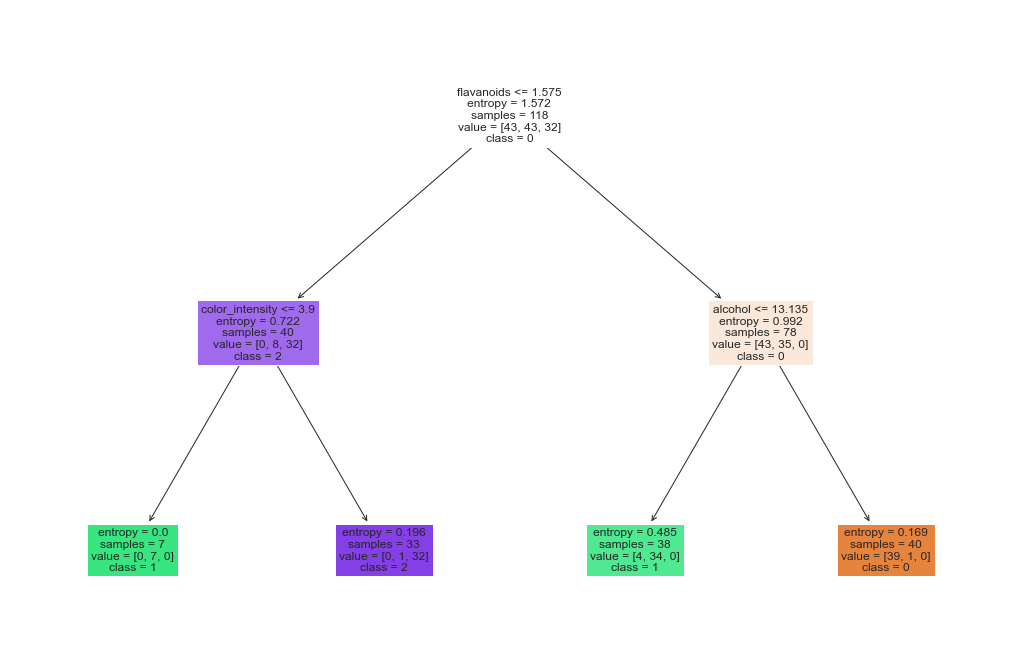

In [128]:
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf_dt2, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )


Prediction on Test And Train Set

In [129]:
report_dt2_train = classification_report(clf_dt2.predict(train_x), train_y)
print(report_dt1_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        32

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [130]:
report_dt2_test = classification_report(test_y, clf_dt2.predict(test_x))
print(report_dt2_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.87      0.93      0.90        28
           2       1.00      0.94      0.97        16

    accuracy                           0.90        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60



More Hyperparameters

In [67]:
clf_dt3 = DecisionTreeClassifier(criterion="entropy", max_depth=2, min_samples_split=3, min_samples_leaf=10)

In [68]:
clf_dt3.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       min_samples_split=3)

In [69]:
report_dt3_train = classification_report(clf_dt3.predict(train_x), train_y)
print(report_dt3_train)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.81      0.88        52
           2       0.81      1.00      0.90        26

    accuracy                           0.91       118
   macro avg       0.90      0.93      0.91       118
weighted avg       0.92      0.91      0.91       118



In [70]:
report_dt3_test = classification_report(test_y, clf_dt3.predict(test_x))
print(report_dt3_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.78      0.89      0.83        28
           2       0.92      0.75      0.83        16

    accuracy                           0.83        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



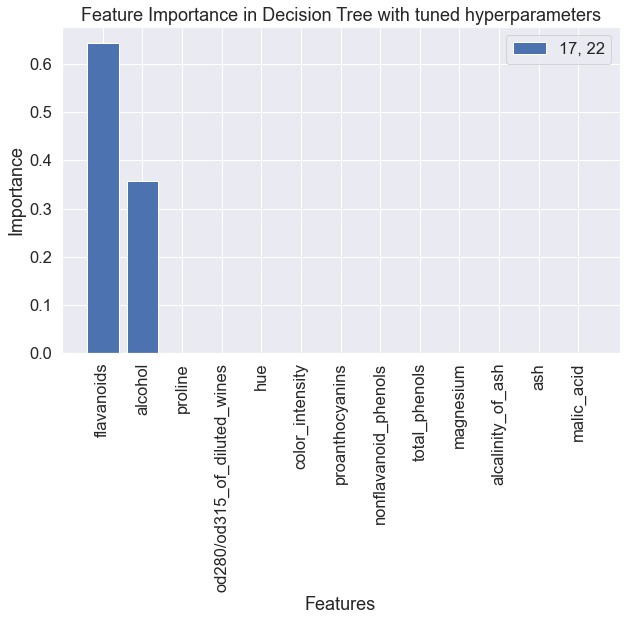

In [73]:
feature_importance = clf_dt3.feature_importances_

sorted_indices = feature_importance.argsort()[::-1]
#  The sorted importance sorts the imporance values using the indices provided
sorted_importance = feature_importance[sorted_indices]
# Sorts the features of the datset in the sorted manner
sorted_features = train_x.columns[sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree with tuned hyperparameters')
plt.xticks(rotation=90)
plt.legend(["17, 22"])
plt.show()

Text(0.85, 0.8, '[17, 22]')

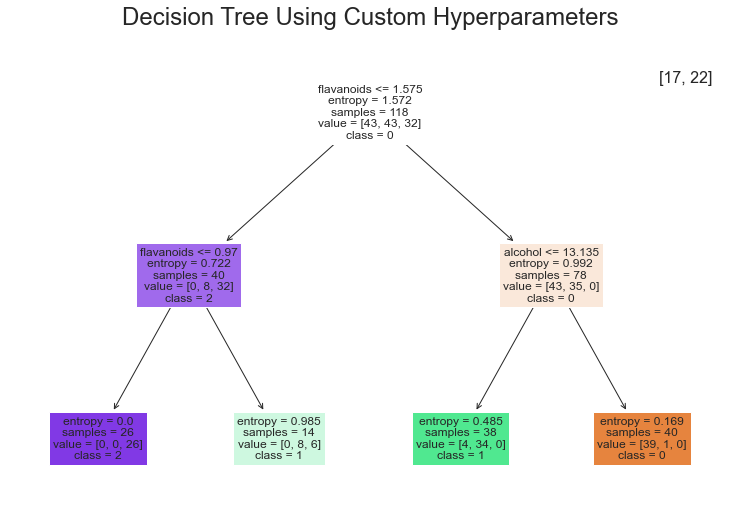

In [72]:
fig = plt.figure(figsize=(13,9))
_ = tree.plot_tree(clf_dt3, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )
plt.title("Decision Tree Using Custom Hyperparameters", fontsize=24)
plt.figtext(0.85,0.8,'[17, 22]',ha='center',fontsize=16)

In [104]:
path = clf_dt1.cost_complexity_pruning_path(train_x, train_y)

In [105]:
path

{'ccp_alphas': array([0.        , 0.01694915, 0.03856923, 0.05478819, 0.0571732 ,
        0.10081644, 0.1899332 , 0.44248421, 0.6712619 ]),
 'impurities': array([0.        , 0.01694915, 0.05551838, 0.11030657, 0.16747976,
        0.2682962 , 0.45822941, 0.90071362, 1.57197552])}

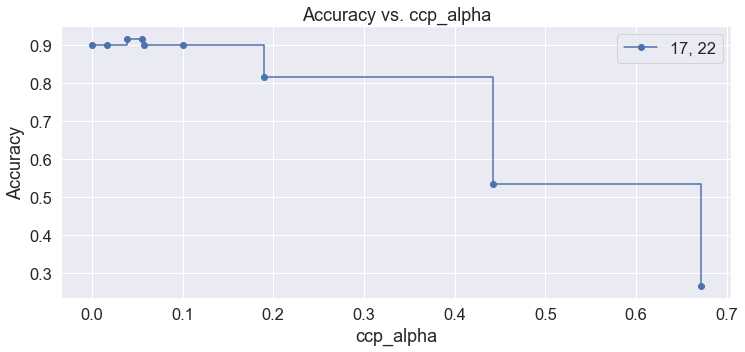

In [106]:
# Extract different values of ccp_alpha and corresponding accuracy scores
ccp_alphas = path.ccp_alphas
scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, criterion="entropy")
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    accuracy = accuracy_score(test_y, y_pred)
    scores.append(accuracy)

# Plot the accuracy scores as a function of ccp_alpha
fig = plt.figure(figsize=(12,5))
plt.plot(ccp_alphas, scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. ccp_alpha")
plt.legend(["17, 22"])
plt.rcParams["font.size"] = 12
plt.show()

In [107]:
index_val = np.array(scores).argmax()

In [108]:
index_val

2

In [109]:
ccp_alpha_value = ccp_alphas[index_val]

In [110]:
ccp_alpha_value

0.038569228733578695

In [111]:
clf_dt5 = DecisionTreeClassifier(criterion="entropy", ccp_alpha=ccp_alpha_value)
clf_dt5.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.038569228733578695, criterion='entropy')

Text(0.85, 0.8, '[17, 22]')

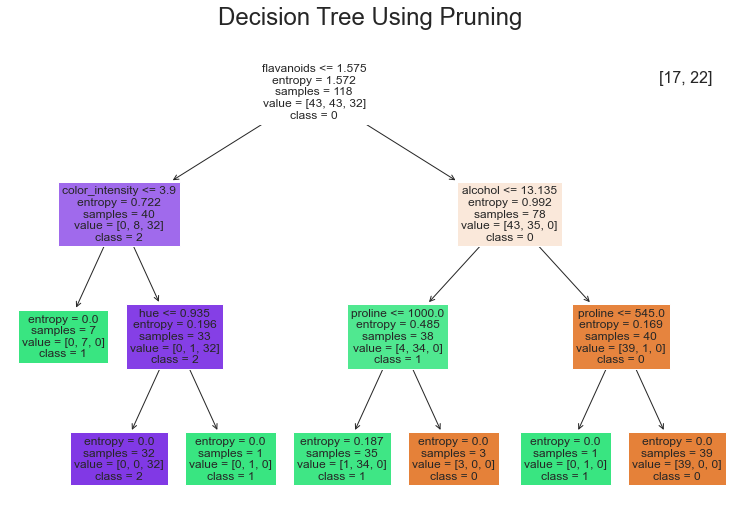

In [112]:
fig = plt.figure(figsize=(13,9))
_ = tree.plot_tree(clf_dt5, 
                   feature_names=wine.feature_names,  
                   class_names=labels,
                   filled=True,
                   fontsize=12
                   )
plt.title("Decision Tree Using Pruning", fontsize=24)
plt.figtext(0.85,0.8,'[17, 22]',ha='center',fontsize=16)

In [38]:
report_dt5_train = classification_report(clf_dt5.predict(train_x), train_y)
print(report_dt5_train)

NameError: name 'clf_dt5' is not defined

In [114]:
report_dt5_test = classification_report(test_y, clf_dt5.predict(test_x))
print(report_dt5_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.96      0.92        28
           2       1.00      0.88      0.93        16

    accuracy                           0.92        60
   macro avg       0.93      0.90      0.92        60
weighted avg       0.92      0.92      0.92        60



In [146]:
scores_new = []
for max_depth_value in range(1,5):
    for min_samples_split_value in range(2, 10):
        for min_samples_leaf_value in range(1,10):
            clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth_value, min_samples_leaf=min_samples_leaf_value, min_samples_split=min_samples_split_value)
            clf.fit(train_x, train_y)
            y_pred = clf.predict(test_x)
            accuracy = accuracy_score(test_y, y_pred)
            scores_new.append({"max_depth":max_depth_value,"min_samples_split":min_samples_split_value, "min_samples_leaf": min_samples_leaf_value, "accuracy": accuracy})


In [93]:
criterion_name = ["entropy", "gini", "log_loss"]

In [94]:
parameters = dict(criterion=criterion_name,
                      max_depth=range(1,10),
                      min_samples_split=range(2,10),
                      min_samples_leaf=range(1,10),
                      )
clf = DecisionTreeClassifier()
gscv = GridSearchCV(clf, param_grid=parameters, scoring="accuracy", cv=5)
gscv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [95]:
print(gscv.best_params_)

{'criterion': 'log_loss', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [39]:
clf_dt4 = DecisionTreeClassifier(criterion="log_loss", max_depth=5, min_samples_leaf=1, min_samples_split=4)
clf_dt4.fit(train_x, train_y)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_split=4)

Text(0.85, 0.8, '[17, 22]')

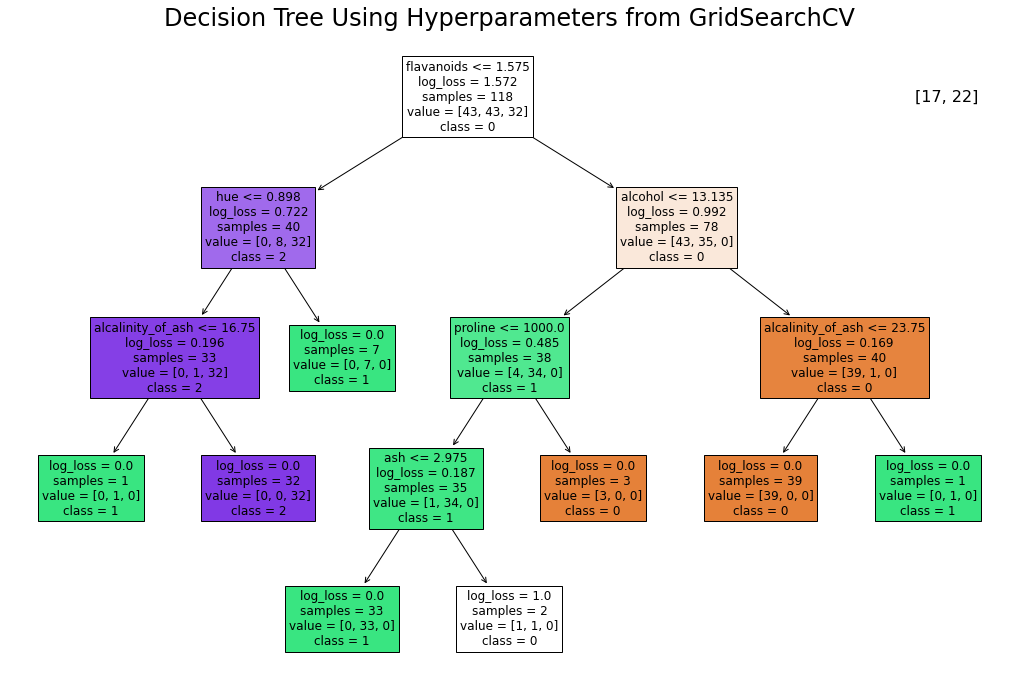

In [43]:
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf_dt4, 
                   feature_names=wine.feature_names,  
                   class_names=["0","1","2"],
                   filled=True,
                   fontsize=12
                   )
plt.title("Decision Tree Using Hyperparameters from GridSearchCV", fontsize=24)
plt.figtext(0.85,0.8,'[17, 22]',ha='center',fontsize=16)

In [41]:
report_dt4_train = classification_report(clf_dt4.predict(train_x), train_y)
print(report_dt4_train)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        32

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



In [42]:
report_dt4_test = classification_report(test_y, clf_dt4.predict(test_x))
print(report_dt4_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.96      0.92        28
           2       1.00      0.88      0.93        16

    accuracy                           0.92        60
   macro avg       0.93      0.90      0.92        60
weighted avg       0.92      0.92      0.92        60



In [46]:
cm = confusion_matrix(test_y, clf_dt4.predict(test_x))

Text(0.9, 0.85, '[17, 22]')

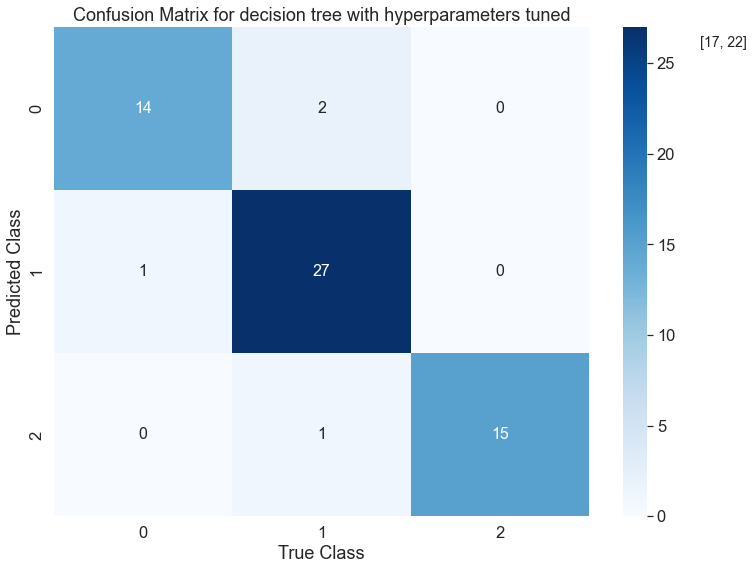

In [49]:
plt.figure(figsize=(12, 9))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues',annot_kws={"fontsize": 16})
sns.set(font_scale=1.5)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title("Confusion Matrix for decision tree with hyperparameters tuned")
plt.figtext(0.9,0.85,'[17, 22]',ha='center',fontsize=14)

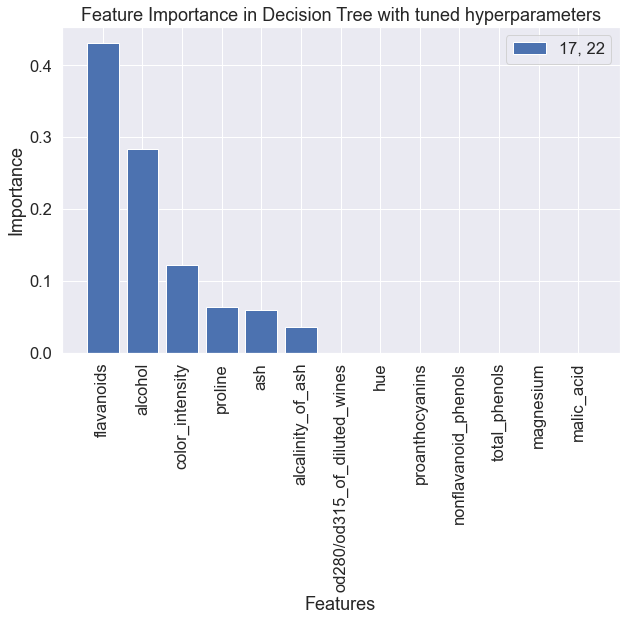

In [50]:
feature_importance = clf_dt4.feature_importances_

sorted_indices = feature_importance.argsort()[::-1]
#  The sorted importance sorts the imporance values using the indices provided
sorted_importance = feature_importance[sorted_indices]
# Sorts the features of the datset in the sorted manner
sorted_features = train_x.columns[sorted_indices]
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree with tuned hyperparameters')
plt.xticks(rotation=90)
plt.legend(["17, 22"])
plt.show()